In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [5]:
df = pd.read_csv('concrete_data.csv')

In [7]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
df.shape

(1030, 9)

In [15]:
df.duplicated().sum()

np.int64(25)

In [19]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
X = df.drop(columns=['Strength'])
y = df['Strength']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
#without any transformation
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Score', r2_score(y_test, y_pred))

Score 0.5761715552226607


In [35]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

np.float64(0.4609940491662864)

C:\Users\sudha\AppData\Local\Temp\ipykernel_30084\2013762570.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\sudha\AppData\Local\Temp\ipykernel_30084\2013762570.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\sudha\AppData\Local\Temp\ipykerne

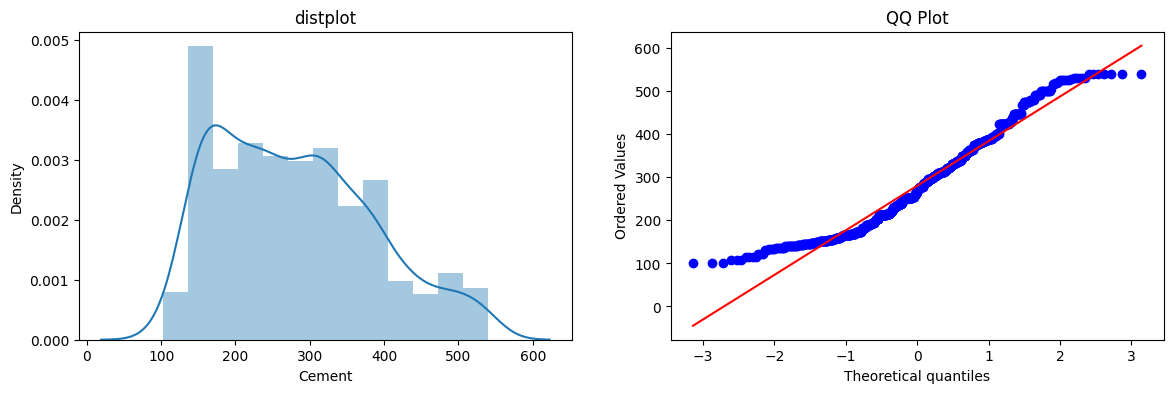

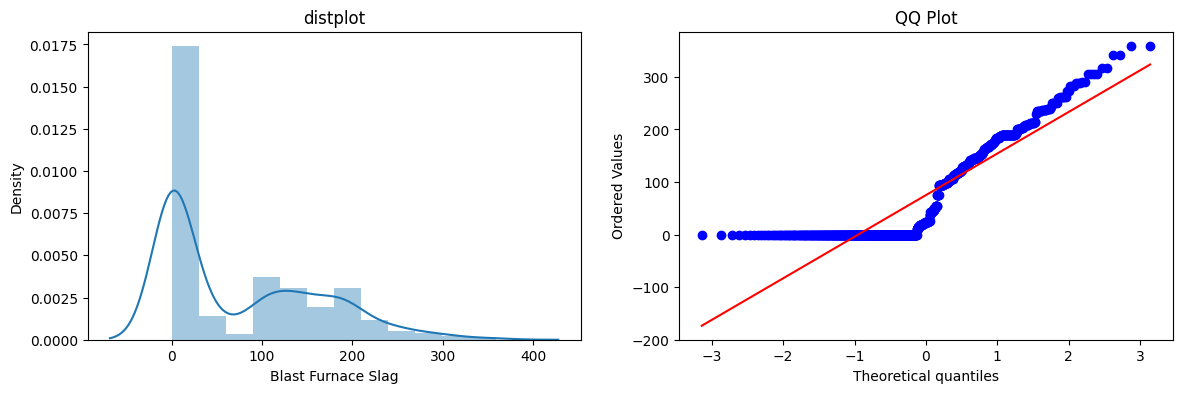

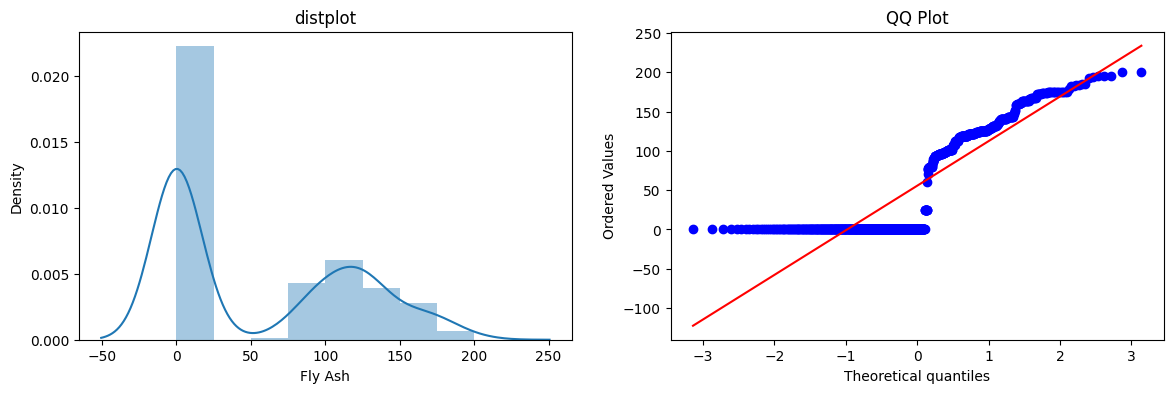

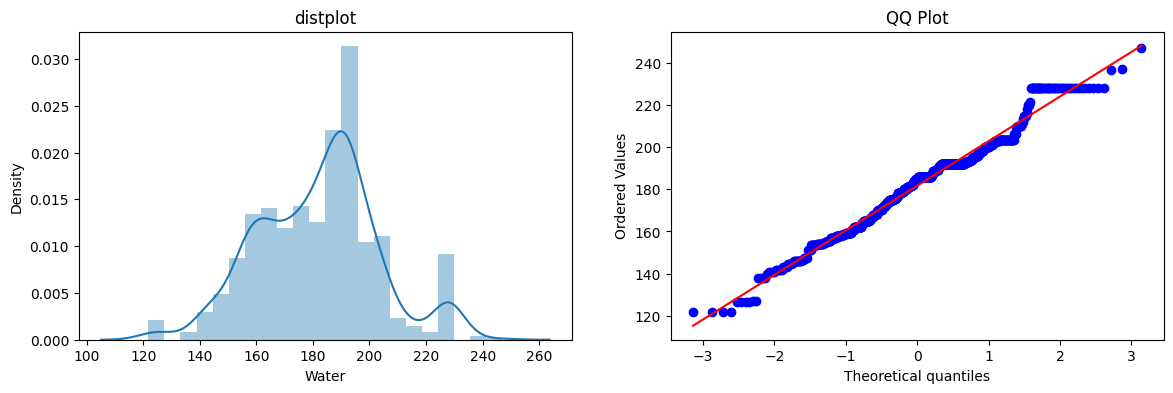

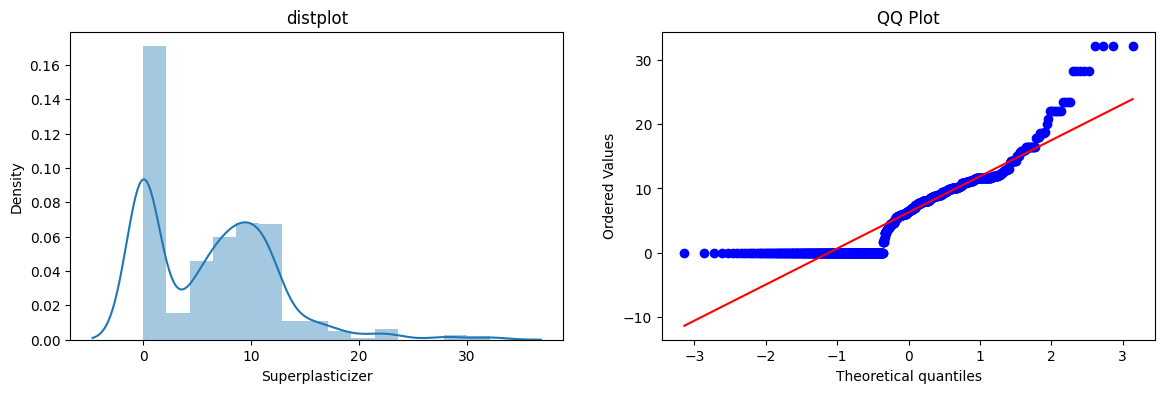

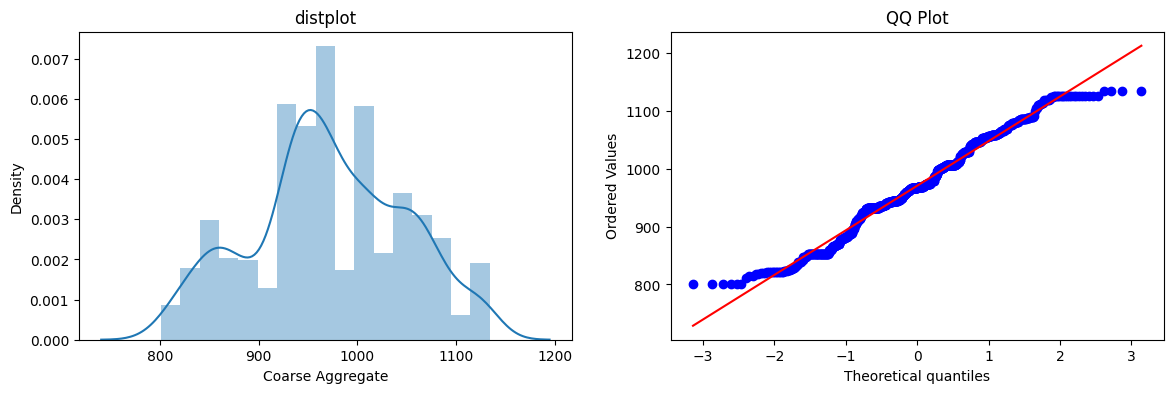

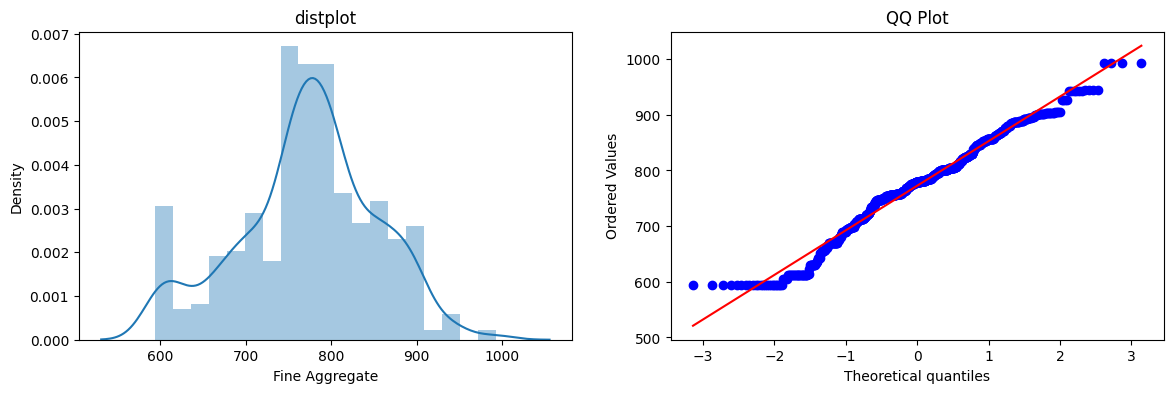

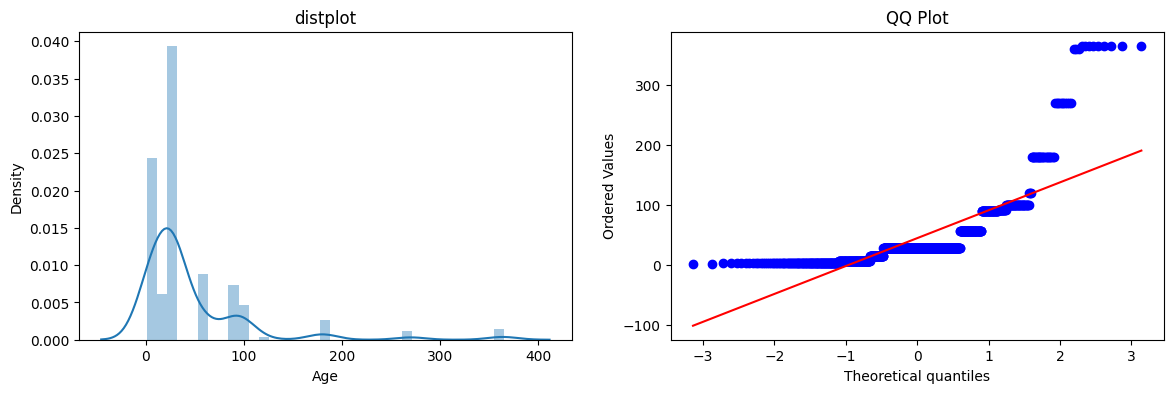

In [37]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title('distplot')

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title('QQ Plot')

Blast Furnance Slag - Right skewed
Fly ash - Bimodel
Superplasticizer - right skewed bimodel
Age - totally waste

In [62]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.0000001)
X_test_transformed = pt.transform(X_test + 0.0000001)

X_train_ts = pd.DataFrame(X_train_transformed, columns=X_train.columns)

In [54]:
pd.DataFrame({'cols':X_train.columns, 'box-cox lambdas':pt.lambdas_})

,cols,box-cox lambdas
0,Cement,0.155330
1,Blast Furnace Slag,0.027521
2,Fly Ash,-0.024674
3,Water,0.886133
4,Superplasticizer,0.093329
5,Coarse Aggregate,1.126432
6,Fine Aggregate,1.770288
7,Age,0.064741


C:\Users\sudha\AppData\Local\Temp\ipykernel_30084\942938001.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\sudha\AppData\Local\Temp\ipykernel_30084\942938001.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_ts[col])
C:\Users\sudha\AppData\Local\Temp\ipyker

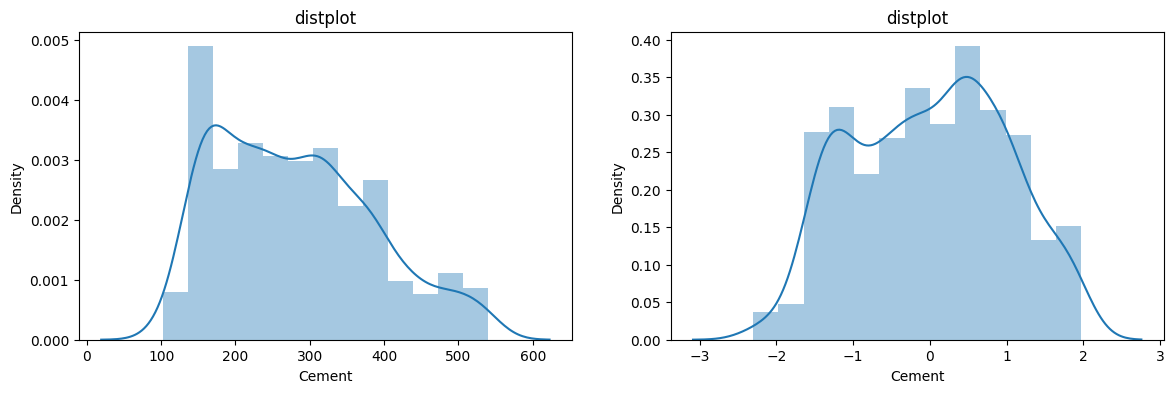

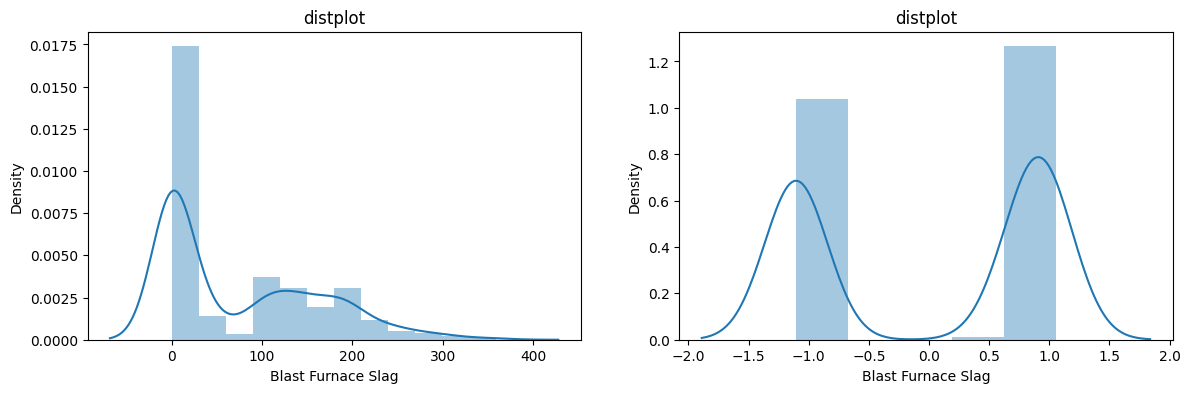

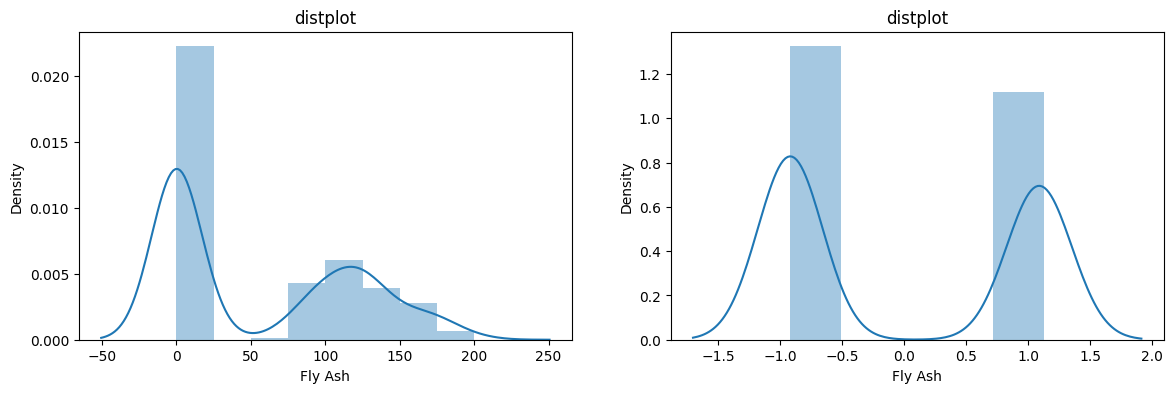

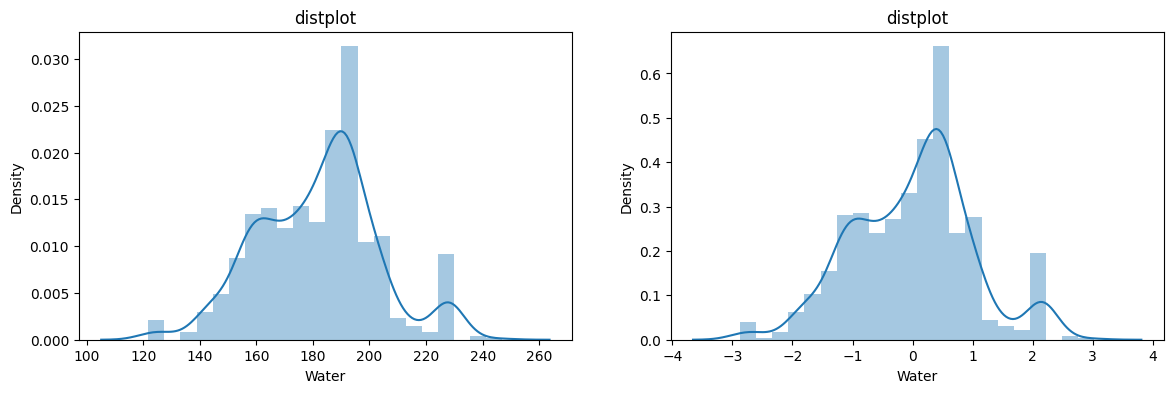

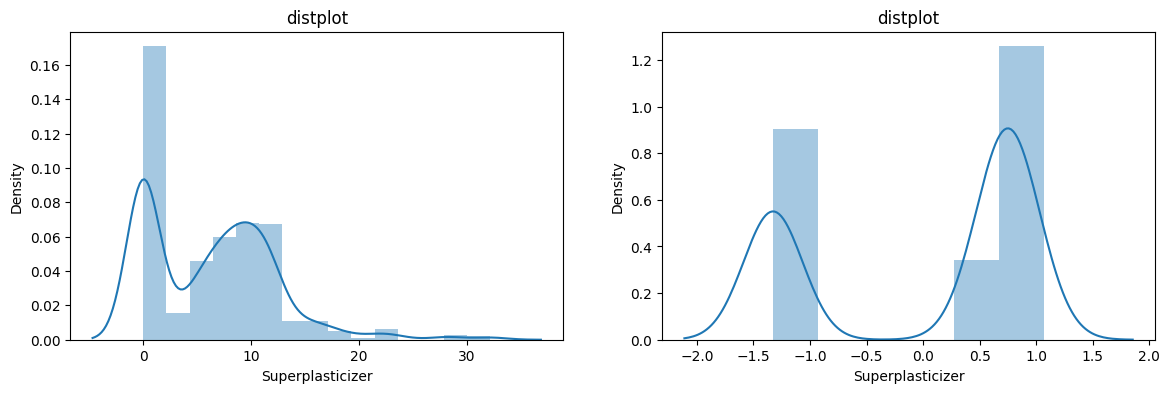

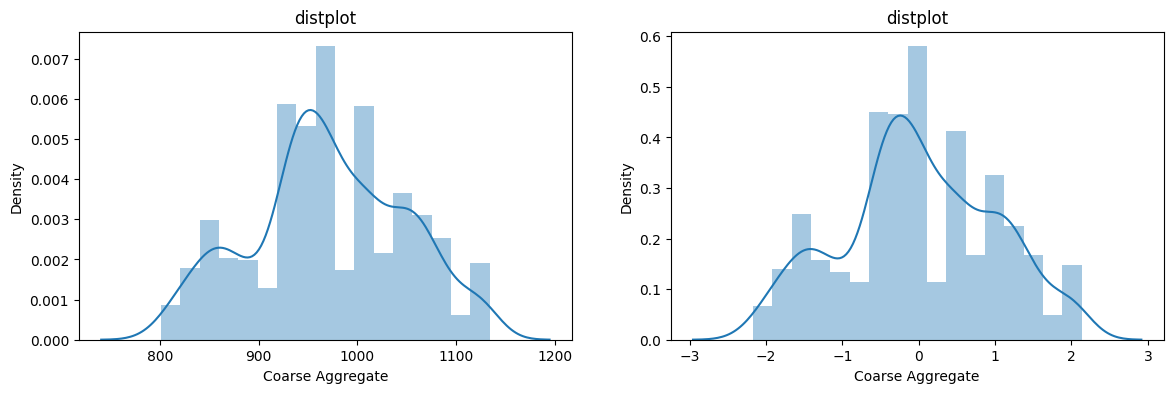

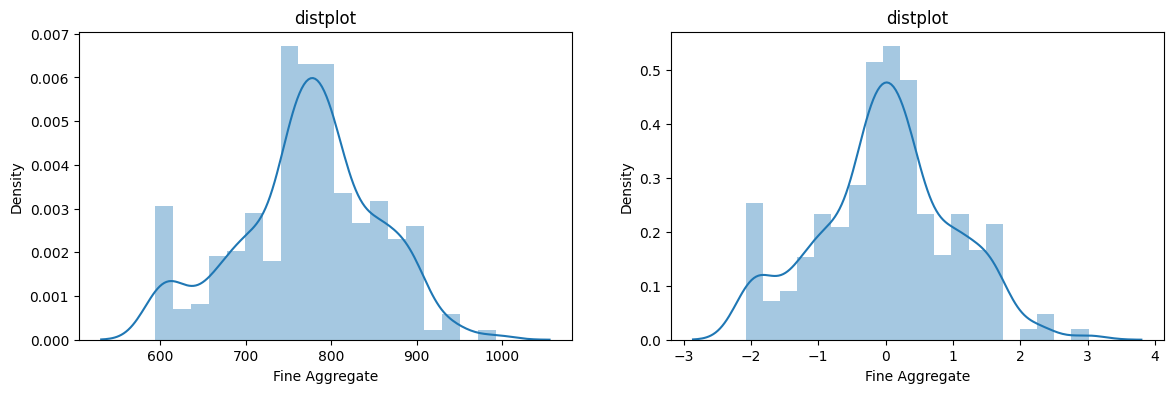

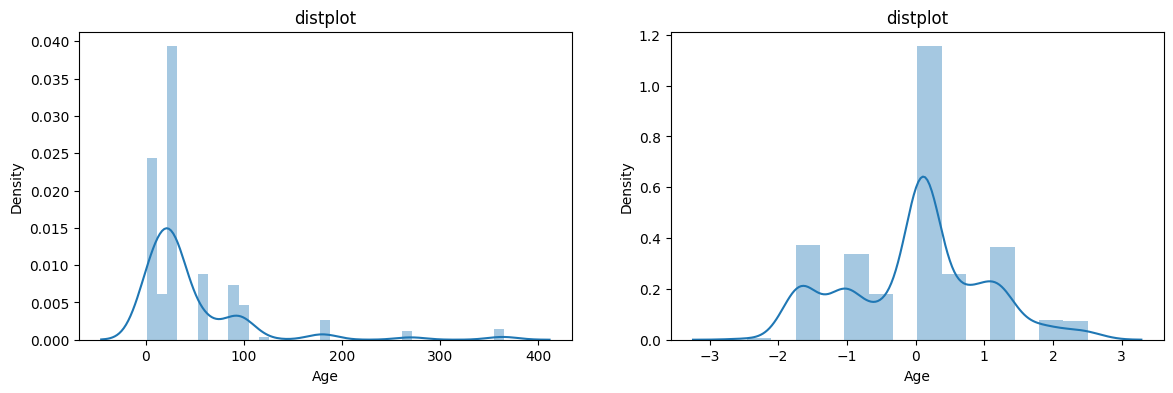

In [74]:
for col in X_train_ts.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title('distplot')

    

    
    plt.subplot(122)
    sns.distplot(X_train_ts[col])
    plt.title('distplot')

In [68]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train_transformed, y_train, scoring='r2'))

np.float64(0.7961710691583843)

In [82]:
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

X_train_ts = pd.DataFrame(X_train_transformed, columns=X_train.columns)

C:\Users\sudha\AppData\Local\Temp\ipykernel_30084\942938001.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\sudha\AppData\Local\Temp\ipykernel_30084\942938001.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_ts[col])
C:\Users\sudha\AppData\Local\Temp\ipyker

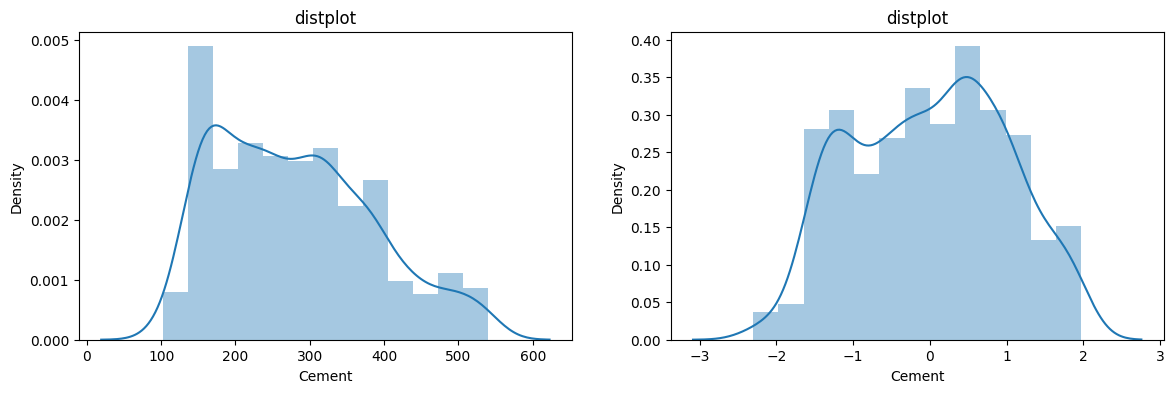

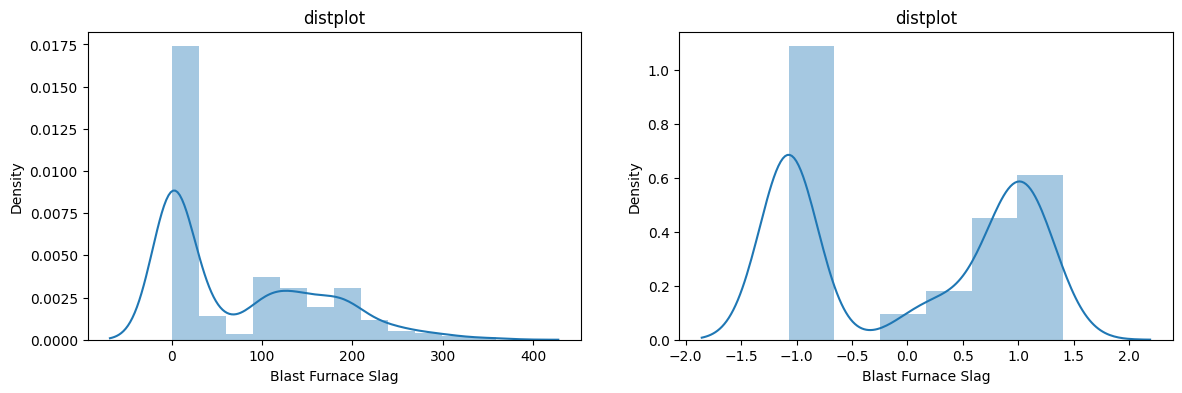

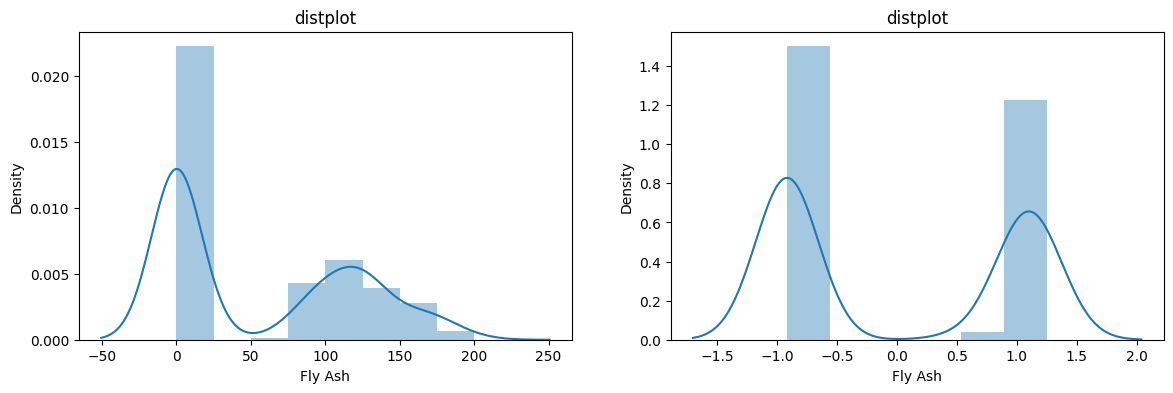

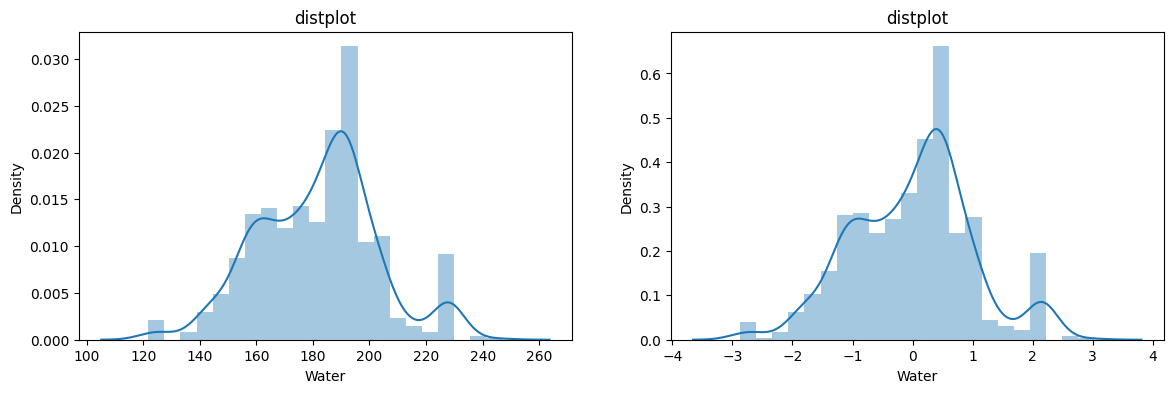

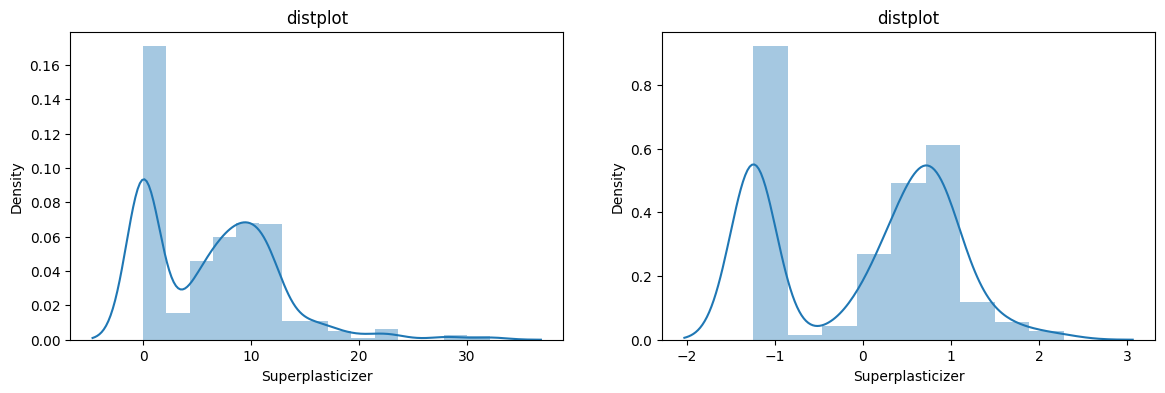

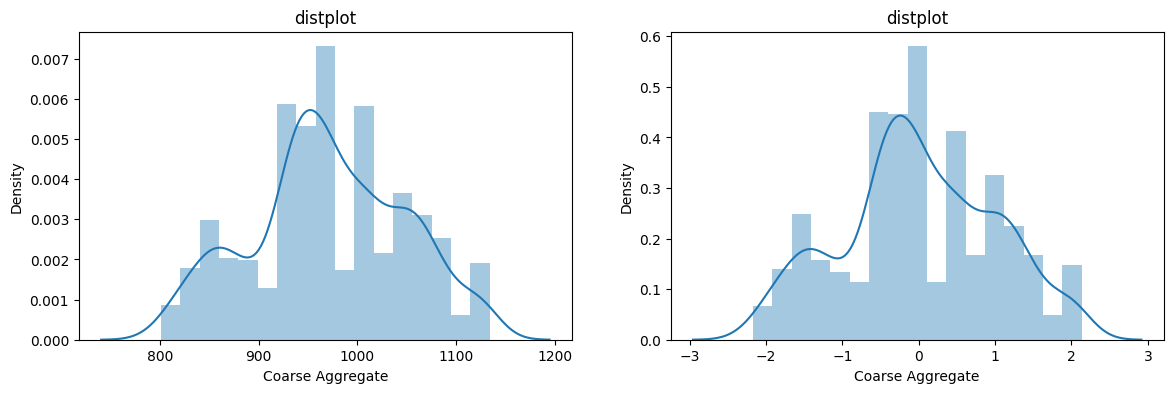

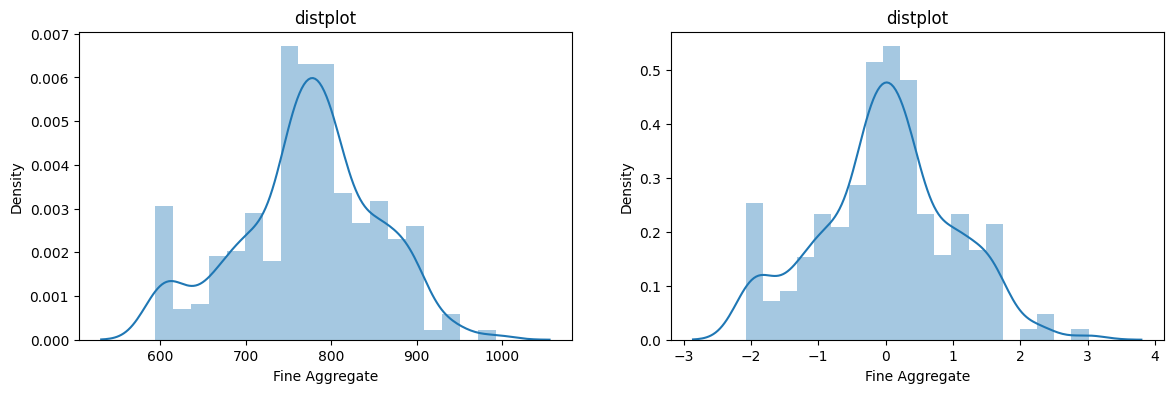

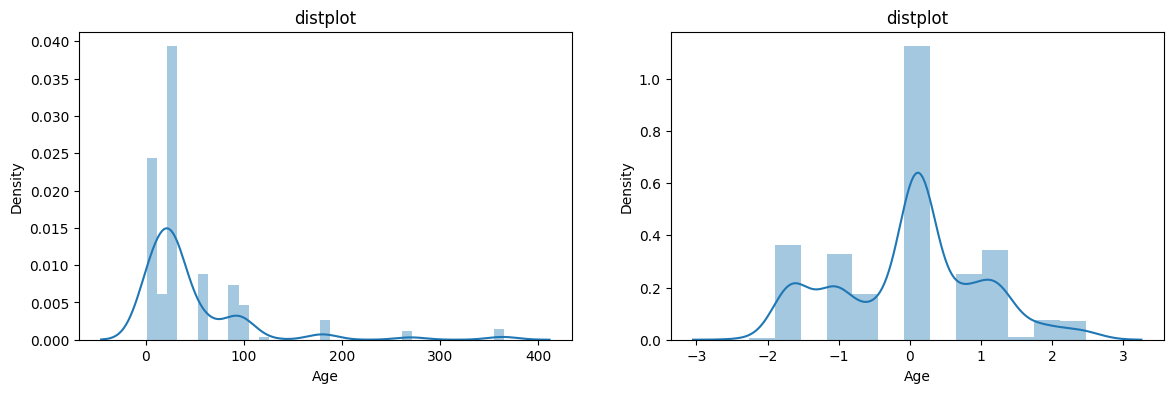

In [84]:
for col in X_train_ts.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title('distplot')

    

    
    plt.subplot(122)
    sns.distplot(X_train_ts[col])
    plt.title('distplot')

In [86]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train_transformed, y_train, scoring='r2'))

np.float64(0.8016689433680846)